 # **HEALTHCARE DATA ANALYSIS** #

## Import Libraries ##

In [41]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

## Import rawdata ##

In [44]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\Patients Healthcare dataset\\Patients Healthcare dataset\\Hospital ER.csv")

In [6]:
df.head(10)


,date,patient_id,patient_gender,patient_age,patient_sat_score,patient_first_inital,patient_last_name,patient_race,patient_admin_flag,patient_waittime,department_referral
0,2020-03-20 08:47:01,145-39-5406,M,69,10.0,H,Glasspool,White,False,39,NaN
1,2020-06-15 11:29:36,316-34-3057,M,4,NaN,X,Methuen,Native American/Alaska Native,True,27,NaN
2,2020-06-20 09:13:13,897-46-3852,F,56,9.0,P,Schubuser,African American,True,55,General Practice
3,2020-02-04 22:34:29,358-31-9711,F,24,8.0,U,Titcombe,Native American/Alaska Native,True,31,General Practice
4,2020-09-04 17:48:27,289-26-0537,M,5,NaN,Y,Gionettitti,African American,False,10,Orthopedics
5,2019-04-20 00:13:05,255-51-2877,M,58,NaN,H,Buff,Asian,False,59,NaN
6,2019-08-23 08:26:21,465-97-0990,F,68,NaN,F,Perrat,White,True,43,NaN
7,2019-07-29 16:57:15,157-31-7520,F,47,NaN,K,Gwillim,Two or More Races,True,23,NaN
8,2020-02-19 06:54:39,432-34-5614,F,79,1.0,E,Dewhirst,White,False,42,NaN
9,2020-10-11 05:25:17,609-17-8678,M,62,NaN,M,Crebo,African American,False,51,NaN


## Data Cleaning ##

In [7]:
df.shape


(9216, 11)

In [13]:
print(df.describe()) 

       patient_age  patient_sat_score  patient_waittime
count  9216.000000        2517.000000       9216.000000
mean     39.855143           4.992054         35.259874
std      22.755125           3.138043         14.735323
min       1.000000           0.000000         10.000000
25%      20.000000           2.000000         23.000000
50%      39.000000           5.000000         35.000000
75%      60.000000           8.000000         48.000000
max      79.000000          10.000000         60.000000


In [9]:
df.dtypes

date                     object
patient_id               object
patient_gender           object
patient_age               int64
patient_sat_score       float64
patient_first_inital     object
patient_last_name        object
patient_race             object
patient_admin_flag         bool
patient_waittime          int64
department_referral      object
dtype: object

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  9216 non-null   object 
 1   patient_id            9216 non-null   object 
 2   patient_gender        9216 non-null   object 
 3   patient_age           9216 non-null   int64  
 4   patient_sat_score     2517 non-null   float64
 5   patient_first_inital  9216 non-null   object 
 6   patient_last_name     9216 non-null   object 
 7   patient_race          9216 non-null   object 
 8   patient_admin_flag    9216 non-null   bool   
 9   patient_waittime      9216 non-null   int64  
 10  department_referral   3816 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 729.1+ KB
None


In [12]:
# Find missing values
print(df.isnull().sum())

date                       0
patient_id                 0
patient_gender             0
patient_age                0
patient_sat_score       6699
patient_first_inital       0
patient_last_name          0
patient_race               0
patient_admin_flag         0
patient_waittime           0
department_referral     5400
dtype: int64


## HEALTHCARE REQUIRMENTS ##

## KPI REQUIRMENTS ##

In [16]:
# Count how many are "admin" in the Role column
Admin_Patients = df[df['patient_admin_flag'] == True].shape[0]

In [17]:
print("Total number of patients who are admin:", Admin_Patients)

Total number of patients who are admin: 4612


In [18]:
# Count how many are " non_admin" in the Role column
Non_admin_Patients = df[df['patient_admin_flag'] == False].shape[0]
print("Total number of patients who are non_admin:", Non_admin_Patients)

Total number of patients who are non_admin: 4604


## CHARTS REQUIRMENTS ##

### Admin and Non-admin patients ###
The chart indicates patients who are either under administartive,that is they might be working at the hospital or the sole provider of the family is working.Non_admistrative patients dont fall under those.

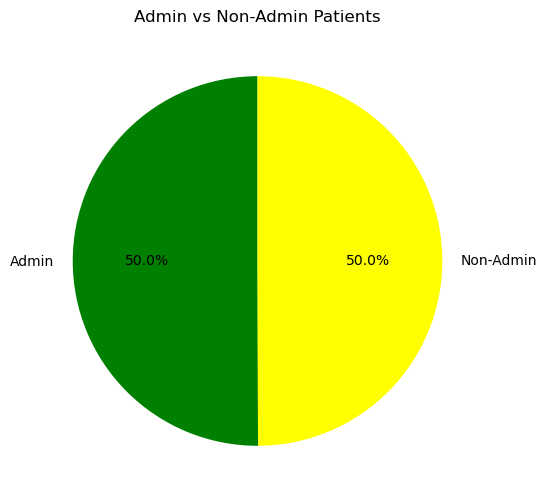

In [22]:
import matplotlib.pyplot as plt

# Counts
Admin_Patients = df[df['patient_admin_flag'] == True].shape[0]
Non_admin_Patients = df[df['patient_admin_flag'] == False].shape[0]

# Put them into a list
counts = [Admin_Patients, Non_admin_Patients]
labels = ["Admin", "Non-Admin"]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90,colors=["green", "yellow"])
plt.title("Admin vs Non-Admin Patients")
plt.show()

### Reffered  and non-Reffered Patients ###

Referral_Status
Non-Referred    5400
Referred        3816
Name: count, dtype: int64


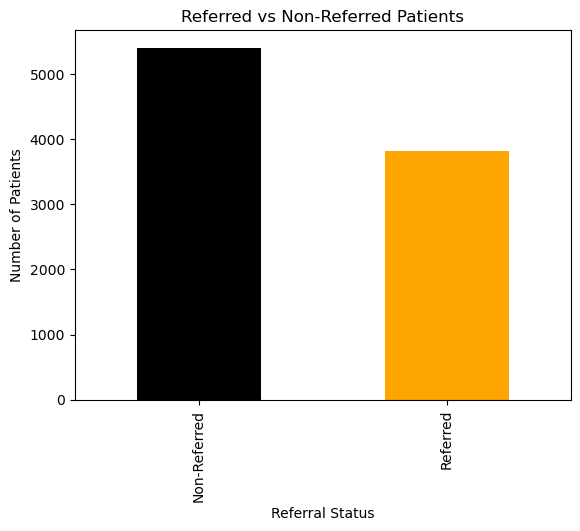

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a new column for referral status
df['Referral_Status'] = df['department_referral'].apply(
    lambda x: 'Referred' if pd.notna(x) else 'Non-Referred'
)

# Count referred vs non-referred
referral_counts = df['Referral_Status'].value_counts()
print(referral_counts)

# Plot as a bar chart
referral_counts.plot(kind='bar', color=['black', 'orange'])
plt.title('Referred vs Non-Referred Patients')
plt.xlabel('Referral Status')
plt.ylabel('Number of Patients')
plt.show()


### Total Patients BY Age_group ###

AgeGroup
0-9      1056
10-19    1179
20-29    1188
30-39    1200
40-49    1135
50-59    1151
60-69    1154
70-79    1153
80+         0
Name: count, dtype: int64


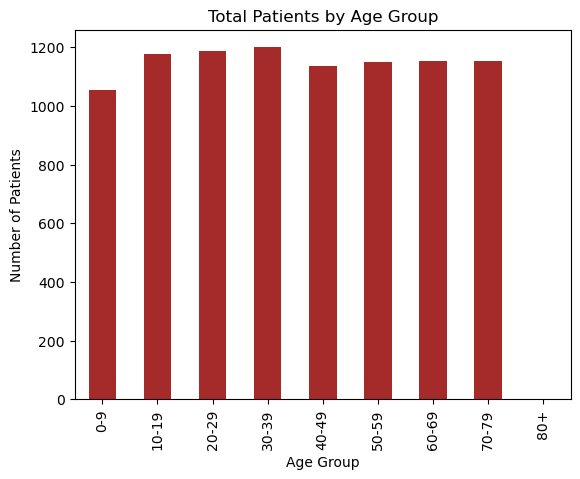

In [11]:


import pandas as pd
import matplotlib.pyplot as plt


# Define age bins
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', 
          '50-59', '60-69', '70-79', '80+']

# Create a new column for Age Group
df['AgeGroup'] = pd.cut(df['patient_age'], bins=bins, labels=labels, right=True)

# Count patients by age group
age_counts = df['AgeGroup'].value_counts().sort_index()
print(age_counts)

# Plot bar chart
age_counts.plot(kind='bar', color='brown')
plt.title('Total Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()



### Total patients BY department refferal ###

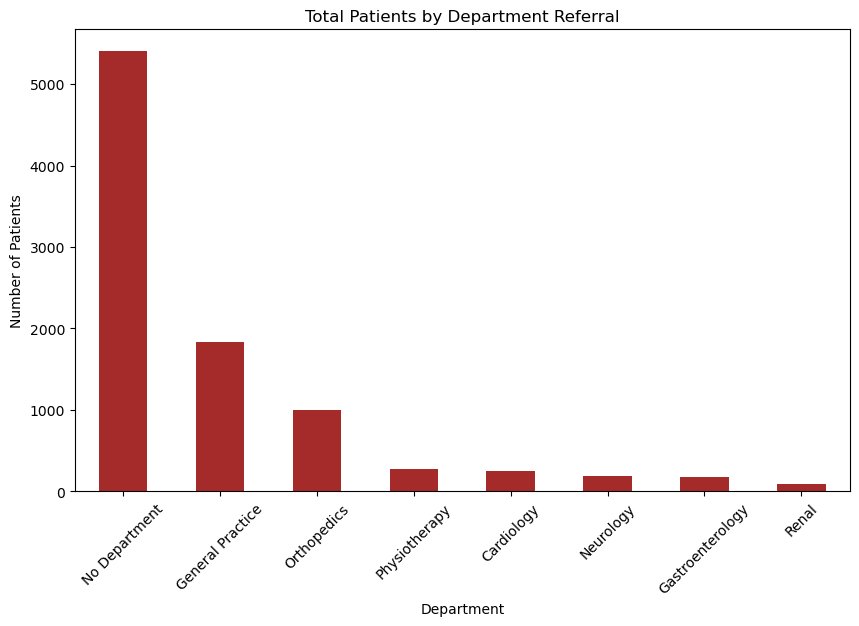

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace NaN with a label so they appear in the chart
df['department_referral'] = df['department_referral'].fillna('No Department')

# Group by department and count patients
dept_counts = df['department_referral'].value_counts()

# Plot bar chart
dept_counts.plot(kind='bar', figsize=(10,6), color='brown')
plt.title('Total Patients by Department Referral')
plt.xlabel('Department')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()


In [23]:
raw_df = pd.read_csv("C:\\Users\\hp\\Downloads\\Patients Healthcare dataset\\Patients Healthcare dataset\\Hospital ER.csv") 
print(raw_df.columns)


Index(['date', 'patient_id', 'patient_gender', 'patient_age',
       'patient_sat_score', 'patient_first_inital', 'patient_last_name',
       'patient_race', 'patient_admin_flag', 'patient_waittime',
       'department_referral'],
      dtype='object')


### Average Patient waittime by Race ###

In [28]:
import matplotlib.pyplot as plt


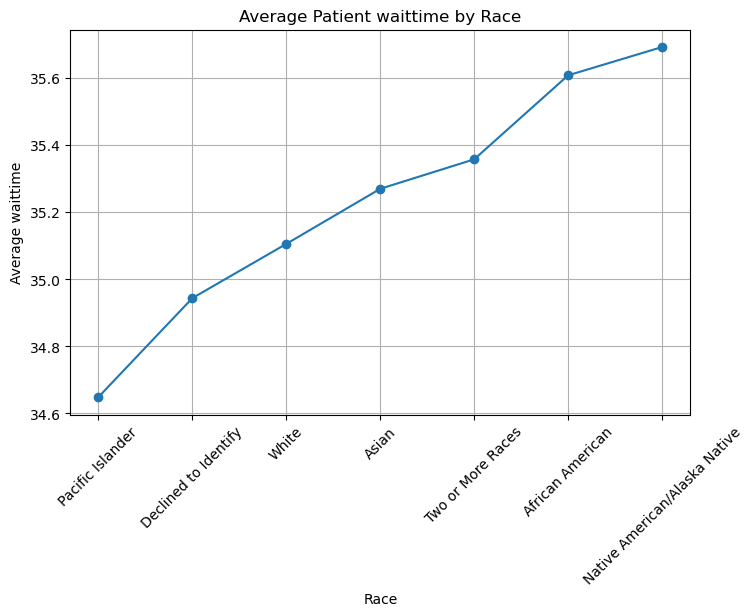

In [30]:
race_satisfaction = df.groupby('patient_race')['patient_waittime'].mean().sort_values()

race_satisfaction.plot(kind='line', marker='o', figsize=(8,5))
plt.title('Average Patient waittime by Race')
plt.xlabel('Race')
plt.ylabel('Average waittime')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Average Patient Satisfaction by Race ###

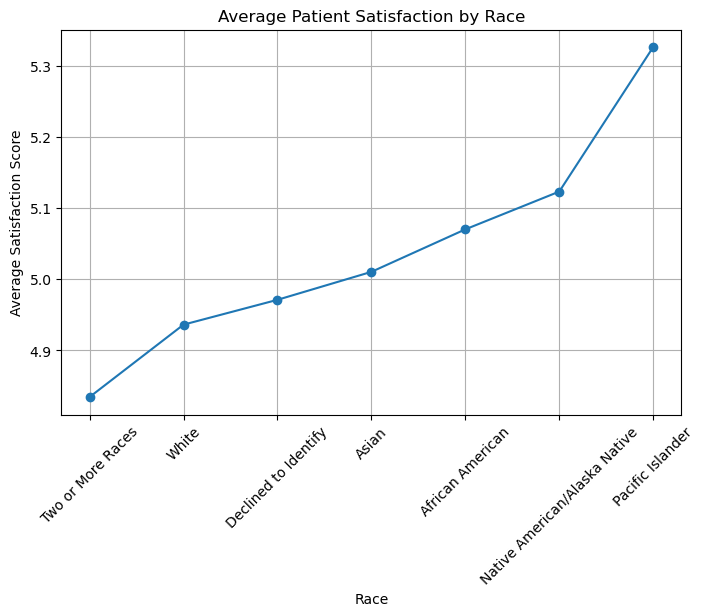

In [31]:
race_satisfaction = df.groupby('patient_race')['patient_sat_score'].mean().sort_values()

race_satisfaction.plot(kind='line', marker='o', figsize=(8,5))
plt.title('Average Patient Satisfaction by Race')
plt.xlabel('Race')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## "Interactive Patient Satisfaction Predictor" ##

In [40]:

from sklearn.linear_model import LinearRegression

# Example dataset
data = {
    'Wait_Time': [39, 55, 31, 23, ],   # minutes
    'Satisfaction_Score': [10, 9, 8, 1,]  # score out of 10
}

df = pd.DataFrame(data)

# Features (X) and target (y)
X = df[['Wait_Time']]
y = df['Satisfaction_Score']

# Model
model = LinearRegression()
model.fit(X, y)

# Interactive input
while True:
    user_input = input("Enter wait time in minutes (or type 'exit' to quit): ")
    
    if user_input.lower() == "exit":
        print("Exiting program...")
        break
    
    try:
        wait_time = float(user_input)
        # FIX: Give it a DataFrame with the same column name
        pred = model.predict(pd.DataFrame([[wait_time]], columns=['Wait_Time']))
        print(f"Predicted Satisfaction Score for {wait_time} min wait: {pred[0]:.2f}")
    except ValueError:
        print("Please enter a valid number.")



Enter wait time in minutes (or type 'exit' to quit):  59


Predicted Satisfaction Score for 59.0 min wait: 11.71


Enter wait time in minutes (or type 'exit' to quit):  42


Predicted Satisfaction Score for 42.0 min wait: 8.07


Enter wait time in minutes (or type 'exit' to quit):  EXIT


Exiting program...
